## Introduction to Python in HPC - NYC Power Sector P3

### Introduction

* In this notebook we look at historical electric load (or demand) data for New York City in 2020.

* Often times your first step to examining research questions is to start with historical data analysis. This give you an opportunity to explore the data and "get a feel" for how it behaves  over time and when analyszed with other variables. 

* Here we look at historical electric load data for the New York City area acquired from the New York Independent System Operator (NYISO). The role of the NYISO is to coordinate, control, and monitor the operation of the electrical power system, usually within a single US state, but sometimes encompassing multiple states. Here, we have the most recent data for 2020.
* By looking at this data can you tell if the covid-19 shutdown impacted the amount of power used in NYC? How big was the power drop off? Also keep in mind their maybe seasonal effects. Furthermore, electricity load is highly impacted by temperature as well as economic activity among other factors. The previous 5 years of load data is included and other related data such as wholesale power prices can be found on NYISO site. 


### Exploring Data and Analysis with NumPy and Pandas

In [2]:
#
# Import NumPy and Pandas library for dataset exploration. Now we use read_csv function from pandas to smoothly pull 
# in the historical time series data. This is a dataframe which in this case is a 2D timeseries that is indexed by date.
#The column names are on top row and is automatically pulled into the dataframe from pandas.
#
# 

import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
NYC_Load_2020 = pd.read_csv('OASIS_Real_Time_Dispatch_Actual_Load_RecentYear061419_06142020.csv', delimiter = ',')
#NYC_load_2020['RTD End Time Stamp'] = pd.to_datetime(df['time'])

In [3]:
#
# The shape of the array will print the dimension of the array. For example,
# this is a two dimensional array of 2012 rows and 8 columns (n,m)
#
NYC_Load_2020.shape

(107437, 4)

In [4]:
#
# With Pandas dates and types are automatically understood and built into the data frame
#
NYC_Load_2020.head(10)

,RTD End Time Stamp,Zone Name,Zone PTID,RTD Actual Load
0,2019/06/14 00:05:00,N.Y.C.,61761,4842.3
1,2019/06/14 00:10:00,N.Y.C.,61761,4805.5
2,2019/06/14 00:15:00,N.Y.C.,61761,4805.2
3,2019/06/14 00:20:00,N.Y.C.,61761,4773.7
4,2019/06/14 00:25:00,N.Y.C.,61761,4738.6
5,2019/06/14 00:30:00,N.Y.C.,61761,4716.8
6,2019/06/14 00:35:00,N.Y.C.,61761,4685.1
7,2019/06/14 00:40:00,N.Y.C.,61761,4662.2
8,2019/06/14 00:45:00,N.Y.C.,61761,4650.8
9,2019/06/14 00:50:00,N.Y.C.,61761,4630.8


In [5]:
NYC_Load_2020.index

RangeIndex(start=0, stop=107437, step=1)

In [6]:
#
# Print out the main variable of interest, which in this case, is the Load.
# 
print(NYC_Load_2020['RTD Actual Load'])

0         4842.3
1         4805.5
2         4805.2
3         4773.7
4         4738.6
5         4716.8
6         4685.1
7         4662.2
8         4650.8
9         4630.8
10        4616.6
11        4591.9
12        4557.0
13        4548.8
14        4512.8
15        4509.5
16        4485.6
17        4475.9
18        4464.1
19        4449.7
20        4424.8
21        4428.8
22        4412.1
23        4397.1
24        4366.9
25        4376.8
26        4366.4
27        4329.5
28        4311.4
29        4314.7
           ...  
107407    4823.3
107408    4830.8
107409    4842.4
107410    4825.8
107411    4856.1
107412    4860.6
107413    4893.0
107414    4861.2
107415    4888.1
107416    4864.1
107417    4887.5
107418    4888.8
107419    4902.6
107420    4876.8
107421    4895.6
107422    4885.5
107423    4896.0
107424    4925.5
107425    4927.1
107426    4899.1
107427    4911.9
107428    4907.3
107429    4918.3
107430    4950.3
107431    4925.1
107432    4941.9
107433    4922.5
107434    4937

In [7]:
#
# To plot this define the X and Y
#
X = NYC_Load_2020["RTD End Time Stamp"]
Y = NYC_Load_2020["RTD Actual Load"]

In [8]:
X.head()

0    2019/06/14 00:05:00
1    2019/06/14 00:10:00
2    2019/06/14 00:15:00
3    2019/06/14 00:20:00
4    2019/06/14 00:25:00
Name: RTD End Time Stamp, dtype: object

In [9]:
Y.head()

0    4842.3
1    4805.5
2    4805.2
3    4773.7
4    4738.6
Name: RTD Actual Load, dtype: float64

In [10]:
X.describe()

count                  107437
unique                 107425
top       2019/11/03 01:00:00
freq                        2
Name: RTD End Time Stamp, dtype: object

In [11]:
Y.describe()

count    107428.000000
mean       5719.047416
std        1313.503008
min        3589.200000
25%        4709.900000
50%        5539.650000
75%        6359.200000
max       10845.300000
Name: RTD Actual Load, dtype: float64

This line must be included in order to show the plot.

In [12]:
%matplotlib inline

# The Pandas `dataframe.plot()` way

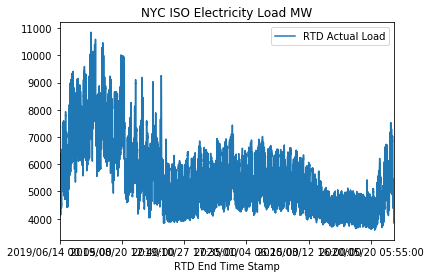

In [13]:
NYC_Load_2020.plot('RTD End Time Stamp', 'RTD Actual Load', title="NYC ISO Electricity Load MW")

## 2500 data points with labeling

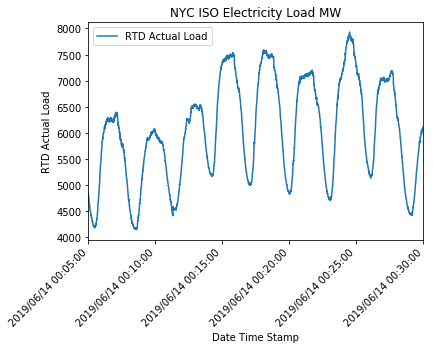

In [14]:
ax = NYC_Load_2020[:2500].plot('RTD End Time Stamp', 'RTD Actual Load', title="NYC ISO Electricity Load MW")
ax.set_xlabel("Date Time Stamp") 
ax.set_ylabel("RTD Actual Load") 
ax.set_xticklabels(NYC_Load_2020[:1000]['RTD End Time Stamp'], rotation=45, ha='right')
pass

# The Matplotlib `plt` way

## 1000 data points

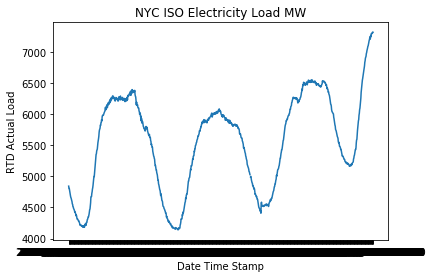

In [15]:
plt.title("NYC ISO Electricity Load MW") 
plt.xlabel("Date Time Stamp") 
plt.ylabel("RTD Actual Load") 
plt.plot(X[:1000], Y[:1000]) 
plt.show() 

### Indexing Arrays

### Plotting and Pandas